In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
# import tensorflow as tf
# import tensorflow_hub as hub
import os


# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 



test_csv=pd.DataFrame(columns=['id','classify'])
train_csv=pd.DataFrame(columns=['id','classify'])


path={'buildings':"data/seg_train/seg_train/buildings/",
'forest':"data/seg_train/seg_train/forest/",
'glacier':"data/seg_train/seg_train/glacier/",
'mountain':"data/seg_train/seg_train/mountain/",
'sea':"data/seg_train/seg_train/sea/",
'street':"data/seg_train/seg_train/street/" }

train_file_path=[]
train_csv_id=[]
train_csv_classify=[]

for category in path:
    i = 0
    file_names = os.listdir(path[category])
    for fn in file_names:
        train_csv_id.append(fn)
        train_csv_classify.append(category)
        train_file_path.append(path[category]+fn)
        i+=1
        if i > 500:
            break
    print( len(train_file_path) )
train_csv['id']=train_csv_id
train_csv['classify']=train_csv_classify
train_csv['file_path']=train_file_path

print(train_csv['classify'].value_counts())
train_csv = train_csv[ train_csv['classify'].isin(['buildings', 'forest'])]
print(train_csv['classify'].value_counts())

501
1002
1503
2004
2505
3006
buildings    501
forest       501
glacier      501
mountain     501
sea          501
street       501
Name: classify, dtype: int64
buildings    501
forest       501
Name: classify, dtype: int64


In [5]:
train_csv.dtypes

id           object
classify     object
file_path    object
dtype: object

test_gray_image.shape (150, 150)
test_gray_image_flat.shape (22500,)


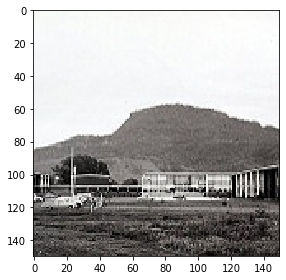

In [4]:
from skimage import io

from skimage.color import rgb2gray

test = train_csv.iloc[0]['file_path']

test_image = io.imread(test)
io.imshow(test_image)

test_gray_image = rgb2gray(test_image)
print('test_gray_image.shape', test_gray_image.shape)
test_gray_image_flat = test_gray_image.flatten()
print('test_gray_image_flat.shape', test_gray_image_flat.shape)

In [6]:
test

'data/seg_train/seg_train/buildings/0.jpg'

In [7]:
gray_images = []

color_images = []

file_paths = train_csv['file_path'].values

for fp in file_paths:

    # for color
    color_image = io.imread(fp)
    
    gray_image = rgb2gray(color_image)
    
    gray_images.append( gray_image.flatten() )
    
    color_images.append( color_image.flatten() )
    
    
print( 'gray_images[0].shape', gray_images[0].shape, 'color_images[0].shape', color_images[0].shape) 


dfcolor = pd.DataFrame(color_images)
dfcolor = dfcolor.fillna(0)





gray_images[0].shape (22500,) color_images[0].shape (67500,)


In [8]:
dfcolor

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,-9,-9,-11,-9,-9,-11,-8,-8,-10,-8,...,38.0,31.0,26.0,23.0,51.0,46.0,43.0,63.0,58.0,55.0
1,68,121,-69,69,123,-69,71,121,-72,70,...,0.0,30.0,17.0,0.0,73.0,57.0,41.0,74.0,58.0,42.0
2,-125,-62,-9,-125,-62,-11,-125,-62,-11,-125,...,56.0,133.0,154.0,61.0,125.0,149.0,53.0,129.0,153.0,57.0
3,-43,-70,-55,-73,-98,-76,-68,-97,-67,-69,...,230.0,243.0,225.0,241.0,238.0,220.0,236.0,246.0,228.0,244.0
4,0,32,65,0,33,63,0,34,64,0,...,173.0,219.0,222.0,203.0,203.0,206.0,189.0,228.0,228.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,11,73,24,41,97,32,56,103,35,95,...,39.0,36.0,54.0,54.0,51.0,69.0,69.0,14.0,30.0,30.0
998,70,65,69,10,8,9,18,20,19,0,...,155.0,163.0,177.0,186.0,117.0,131.0,142.0,112.0,129.0,139.0
999,-127,125,61,14,11,0,27,32,0,94,...,116.0,174.0,153.0,88.0,131.0,101.0,47.0,123.0,87.0,37.0
1000,69,84,91,98,110,-122,-111,-101,-66,79,...,20.0,20.0,14.0,14.0,33.0,28.0,25.0,46.0,41.0,38.0


(150, 150, 3)


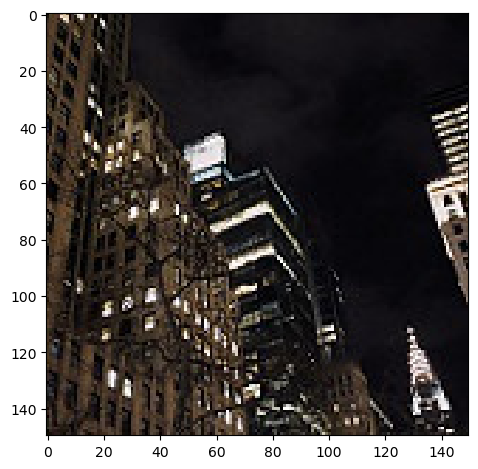

In [5]:
test_fp = train_csv.iloc[0]['file_path']
test_image = io.imread(test_fp)
print(test_image.shape)
io.imshow(test_image)

(150, 150)


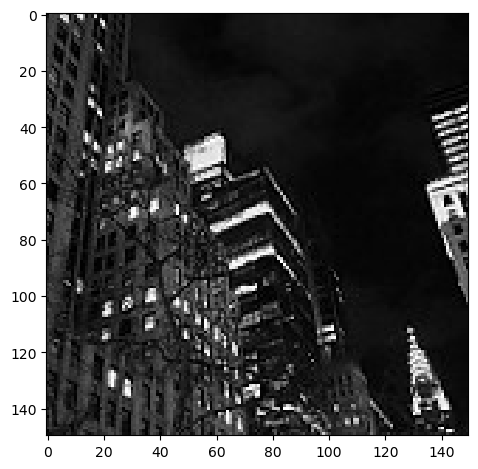

In [6]:
test_fp = train_csv.iloc[0]['file_path']

test_image = io.imread(test_fp)

test_image_gray = rgb2gray(test_image)

print(test_image_gray.shape)

io.imshow(test_image_gray)

In [7]:
X = dfcolor.values
y = train_csv['classify']
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)



In [8]:
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

model.fit(X_train, y_train)

SVC()

In [9]:
# COLOR with just 500 buildings and forests images each class
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   buildings       0.85      0.85      0.85       124
      forest       0.85      0.86      0.85       127

    accuracy                           0.85       251
   macro avg       0.85      0.85      0.85       251
weighted avg       0.85      0.85      0.85       251



In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   buildings       0.87      0.81      0.84       124
      forest       0.83      0.88      0.85       127

    accuracy                           0.85       251
   macro avg       0.85      0.85      0.85       251
weighted avg       0.85      0.85      0.85       251



In [21]:
fp = pd.DataFrame(  model.feature_importances_ )

fp.columns = ['feature_importance']
fp['pixel'] = dfcolor.columns
fp.head()

,feature_importance,pixel
0,0.00000,0
1,0.00000,1
2,0.00087,2
3,0.00000,3
4,0.00000,4


In [22]:
fp = fp.sort_values('feature_importance', ascending=False)
fp.head()

,feature_importance,pixel
5789,0.007474,5789
2624,0.007026,2624
1394,0.006796,1394
1391,0.006794,1391
1676,0.006492,1676


<AxesSubplot:>

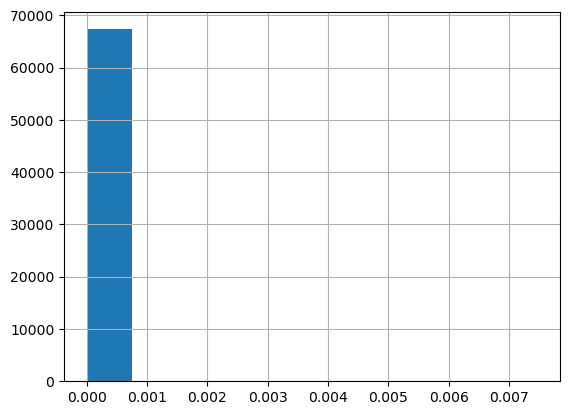

In [25]:
fp.feature_importance.hist()